In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/juwieczo/DataspellProjects/meisd_project/data/MEISD_text.csv')

In [12]:
df.head(5)

,TV Series,Utterances,dialog_ids,uttr_ids,seasons,episodes,start_times,end_times,sentiment,emotion,intensity,emotion2,intensity2,emotion3,intensity3
0,GA,look around you,1,0,1,1,00:02:27:589,00:02:28:567,neutral,neutral,NaN,NaN,NaN,NaN,NaN
1,GA,say hello to your competition,1,1,1,1,00:02:28:910,00:02:30:513,neutral,neutral,NaN,NaN,NaN,NaN,NaN
2,GA,eight of you will switch to an easier specialty,1,2,1,1,00:02:31:387,00:02:34:060,neutral,neutral,NaN,NaN,NaN,NaN,NaN
3,GA,five of you will crack under the pressure,1,3,1,1,00:02:34:134,00:02:36:002,neutral,neutral,NaN,NaN,NaN,NaN,NaN
4,GA,two of you will be asked to leave,1,4,1,1,00:02:36:059,00:02:37:723,neutral,neutral,NaN,NaN,NaN,NaN,NaN


In [6]:
max(df.dialog_ids)

1125

In [10]:
import statistics
statistics.mean(df.Utterances.str.len())

35.32647249837638

In [11]:
df.describe()

,dialog_ids,uttr_ids,seasons,episodes,intensity3
count,20017.000000,20017.000000,20017.000000,20017.000000,67.000000
mean,537.299995,9.337363,3.855523,9.560274,1.477612
std,328.879190,6.215363,2.184969,6.434132,0.785440
min,1.000000,0.000000,1.000000,1.000000,1.000000
25%,262.000000,4.000000,2.000000,4.000000,1.000000
50%,509.000000,9.000000,4.000000,8.000000,1.000000
75%,818.000000,14.000000,5.000000,14.000000,2.000000
max,1125.000000,40.000000,10.000000,26.000000,3.000000


In [48]:
df.head(5)

,TV Series,Utterances,dialog_ids,uttr_ids,seasons,episodes,start_times,end_times,sentiment,emotion,intensity,emotion2,intensity2,emotion3,intensity3
0,GA,look around you,1,0,1,1,00:02:27:589,00:02:28:567,neutral,neutral,NaN,NaN,NaN,NaN,NaN
1,GA,say hello to your competition,1,1,1,1,00:02:28:910,00:02:30:513,neutral,neutral,NaN,NaN,NaN,NaN,NaN
2,GA,eight of you will switch to an easier specialty,1,2,1,1,00:02:31:387,00:02:34:060,neutral,neutral,NaN,NaN,NaN,NaN,NaN
3,GA,five of you will crack under the pressure,1,3,1,1,00:02:34:134,00:02:36:002,neutral,neutral,NaN,NaN,NaN,NaN,NaN
4,GA,two of you will be asked to leave,1,4,1,1,00:02:36:059,00:02:37:723,neutral,neutral,NaN,NaN,NaN,NaN,NaN


In [49]:
# Mapa poprawnych emocji
emotion_mapping = {
    "disgust": "disgust", "digust": "disgust",
    "joy": "joy",
    "neutral": "neutral",
    "anger": "anger", "anger1": "anger",
    "sadness": "sadness", "sadnes": "sadness", "asadness": "sadness",
    "acceptance": "acceptance",
    "surprise": "surprise", "sur": "surprise",
    "fear": "fear", "faer": "fear", "fera": "fear",
    "like": "like",
    "df": None, "l": None, "an": None  # Usuwamy błędne wartości
}

emotion_mapping = {
    "disgust": "disgust", "digust": "disgust",
    "anger": "anger", "anger1": "anger",
    "sadness": "sadness", "sadnes": "sadness", "asadness": "sadness",
    "fear": "fear", "faer": "fear", "fera": "fear",
    "anxiety": "anxiety",
    "depression": "depression",
    "shame": "shame",
    "nervousness": "nervousness",
    "pain": "pain",
    "jealousy": "jealousy",
    "guilt": "guilt"
}

def normalize_emotion(emotion):
    emotion = str(emotion).strip().lower()
    return emotion_mapping.get(emotion, None) if emotion != "nan" else None


df[['emotion', 'emotion2', 'emotion3']] = df[['emotion', 'emotion2', 'emotion3']].map(normalize_emotion)

# Filtrowanie tylko wybranych emocji
df_filtered = df[df[['emotion', 'emotion2', 'emotion3']].apply(lambda x: x.isin(emotion_mapping.values()).any(), axis=1)]

# Pobranie wszystkich emocji
all_emotions = df_filtered[['emotion', 'emotion2', 'emotion3']].values.flatten()
filtered_emotions = [emo for emo in all_emotions if emo]

# Zlicz wszystkie emocje
emotion_counts = Counter(filtered_emotions)

# Oblicz procentowy udział emocji
total_emotions = sum(emotion_counts.values())
emotion_percentages = {k: (v / total_emotions) * 100 for k, v in sorted(emotion_counts.items(), key=lambda x: x[1], reverse=True)}

# Wypisanie statystyk
print(f"Łączna liczba rekordów po filtracji: {len(df_filtered)}")
print("Liczba wystąpień poszczególnych emocji:")
for emotion, count in emotion_counts.items():
    print(f"{emotion}: {count}")


Łączna liczba rekordów po filtracji: 10461
Liczba wystąpień poszczególnych emocji:
disgust: 6399
sadness: 3687
anger: 3761
fear: 1245


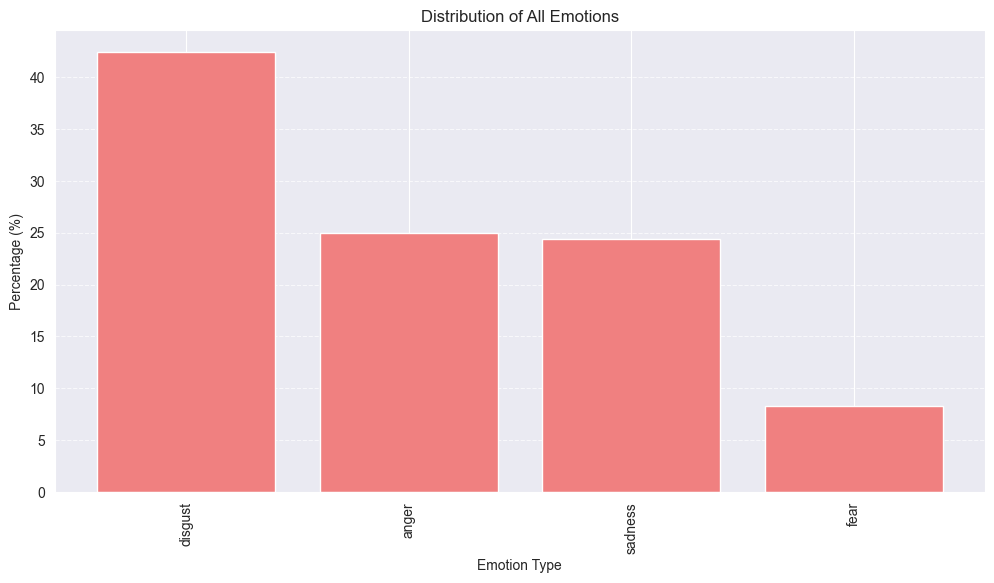

In [50]:
# Tworzenie wykresu
plt.figure(figsize=(12, 6))
plt.bar(emotion_percentages.keys(), emotion_percentages.values(), color='lightcoral')
plt.xlabel("Emotion Type")
plt.ylabel("Percentage (%)")
plt.title("Distribution of All Emotions")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Wyświetlenie wykresu
plt.show()

In [51]:
df_filtered.to_csv("C:/Users/juwieczo/DataspellProjects/meisd_project/data/filtered_negative_MEISD_intensity.csv", index=False)

In [52]:
meta_df = df_filtered

In [53]:
# For the multilabel classification we use:
columns = ['Utterances', 'dialog_ids', 'intensity', 'intensity2', 'intensity3']
meta_dfs = meta_df[columns].copy()

In [54]:
meta_dfs.loc[:, 'intensity'] = pd.to_numeric(meta_dfs['intensity'], errors='coerce')
meta_dfs.loc[:, 'intensity2'] = pd.to_numeric(meta_dfs['intensity2'], errors='coerce')
meta_dfs.loc[:, 'intensity3'] = pd.to_numeric(meta_dfs['intensity3'], errors='coerce')


#Zamień wartości na liczby całkowite
meta_dfs['intensity'] = pd.to_numeric(meta_dfs['intensity'], errors='coerce').fillna(0)
meta_dfs['intensity2'] = pd.to_numeric(meta_dfs['intensity2'], errors='coerce').fillna(0)
meta_dfs['intensity3'] = pd.to_numeric(meta_dfs['intensity3'], errors='coerce').fillna(0)

#Zamień wartości zawierające tylko białe znaki lub '`', 'neu', 'po' na NaN
meta_dfs['intensity'] = meta_dfs['intensity'].replace(r'^\s*$', np.nan, regex=True)
meta_dfs['intensity'] = meta_dfs['intensity'].replace(['`', 'neu', 'po'], np.nan)
meta_dfs['intensity2'] = meta_dfs['intensity2'].replace(r'^\s*$', np.nan, regex=True)
meta_dfs['intensity2'] = meta_dfs['intensity2'].replace(['`', 'neu', 'po'], np.nan)
meta_dfs['intensity3'] = meta_dfs['intensity3'].replace(r'^\s*$', np.nan, regex=True)
meta_dfs['intensity3'] = meta_dfs['intensity3'].replace(['`', 'neu', 'po'], np.nan)

#Użyj forward fill, aby uzupełnić brakujące wartości poprzedzającą wartością
meta_dfs['intensity'] = meta_dfs['intensity'].ffill()
meta_dfs['intensity2'] = meta_dfs['intensity2'].ffill()
meta_dfs['intensity3'] = meta_dfs['intensity3'].ffill()

#Usuń znaki niebędące cyframi (np. '`') za pomocą wyrażeń regularnych
meta_dfs['intensity'] = meta_dfs['intensity'].replace(r'\D', '', regex=True).astype(int)  # Usuwa wszystko, co nie jest cyfrą
meta_dfs['intensity2'] = meta_dfs['intensity2'].replace(r'\D', '', regex=True).astype(int)
meta_dfs['intensity3'] = meta_dfs['intensity3'].replace(r'\D', '', regex=True).astype(int)

In [55]:
first_25_data = []
last_25_data = []

def process_group(group):
    num_rows = len(group)
    quarter_size = max(1, num_rows // 4)

    # First 25%
    first_25 = group.iloc[:quarter_size]
    last_25 = group.iloc[-quarter_size:]

    # Maksymalna intensywność
    first_25_max_intensity = first_25['intensity'].max()
    last_25_max_intensity = last_25['intensity'].max()

    # Łączenie wypowiedzi już tutaj
    first_utterances = " ".join(first_25['Utterances'])
    last_utterances = " ".join(last_25['Utterances'])

    first_25_data.append(pd.Series({
        'dialog_ids': group['dialog_ids'].iloc[0],
        'Utterances': first_utterances,
        'max_intensity': first_25_max_intensity
    }))

    last_25_data.append(pd.Series({
        'dialog_ids': group['dialog_ids'].iloc[0],
        'Utterances': last_utterances,
        'max_intensity': last_25_max_intensity
    }))

meta_dfs.groupby('dialog_ids').apply(process_group)

first_25_df = pd.DataFrame(first_25_data)
last_25_df = pd.DataFrame(last_25_data)


C:\Users\juwieczo\AppData\Local\Temp\ipykernel_21496\3186010028.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  meta_dfs.groupby('dialog_ids').apply(process_group)


In [56]:
first_25_df

,dialog_ids,Utterances,max_intensity
0,1,like i said,1
1,2,"now you think i'm gay. no, i'm not gay",1
2,3,now i have to like it here,2
3,4,yes no other reason? just a favor for an old p...,2
4,5,if he doesn't respond to these tests in the ne...,2
...,...,...,...
1080,1121,i was thinking exactly the same thing you give...,2
1081,1122,"just to be clear, he backed down",3
1082,1123,"hey, michael, did you fall into a koi pond?",1
1083,1124,toy story. don't you mean koi story?,1


In [57]:
first_25_df.to_csv('C:/Users/juwieczo/DataspellProjects/meisd_project/data/filtered_negative_MEISD_intensity_max_first_25_conv.csv', index=False, header=True)

In [58]:
last_25_df.head()

,dialog_ids,Utterances,max_intensity
0,1,yeah. i hear one of them's a model,2
1,2,you will answer every page at a run - a run - ...,1
2,3,you're sexually harassing me. - i'm riding an ...,1
3,4,i am not slow. you are slow you want to bet? y...,2
4,5,"so when we call ""time of death,"" we know that ...",2


In [59]:
# Tworzenie nowej kolumny bazującej na intensity
last_25_df['binary_intensity'] = (last_25_df['max_intensity'] == 2).astype(int)

In [45]:
last_25_df

,dialog_ids,Utterances,max_intensity,binary_intensity
0,1,yeah. i hear one of them's a model,2,1
1,2,you will answer every page at a run - a run - ...,1,0
2,3,you're sexually harassing me. - i'm riding an ...,1,0
3,4,i am not slow. you are slow you want to bet? y...,2,1
4,5,"so when we call ""time of death,"" we know that ...",2,1
...,...,...,...,...
1080,1121,"we do it the hard way all right, i will meet w...",2,1
1081,1122,"i will. i will, kevin. i will make that my top...",1,0
1082,1123,no. don't. i'm not going to bump. i'm not goin...,1,0
1083,1124,"damn it, he'd still look good",2,1
